## 2.5 Unsupervised Learning - Clustering 

# 🧩 Clustering Analysis - Notes & Workflow

## 1. K-Means Clustering

### ✅ Steps:
- Apply **K-Means Clustering** on the dataset.
- Use the **Elbow Method** to determine the optimal number of clusters `K`.
- Visualize:
  - Elbow Curve showing Sum of Squared Distances (Inertia) vs. different `K` values.
  - Cluster assignments on a 2D projection (e.g., PCA or selected features).

---

## 2. Hierarchical Clustering

### ✅ Steps:
- Perform **Hierarchical Clustering** on the dataset.
- Plot a **Dendrogram** to visualize the clustering process.
- Analyze the dendrogram to estimate a suitable number of clusters.
- Optional: Visualize cluster assignments similarly to K-Means.

---

## 3. Cluster vs. Disease Label Comparison

### ✅ Steps:
- Compare the discovered clusters to the actual disease labels.
- Possible evaluation techniques:
  - **Contingency Table (Cross-tabulation)** to observe the relationship.
  - **Adjusted Rand Index**, **Homogeneity Score**, or other clustering evaluation metrics (optional).
- Visualize:
  - Scatter plots or heatmaps comparing cluster assignments to true disease labels.

---

## 🎯 Deliverable:

✔ K-Means clustering results with Elbow Curve and cluster visualization.  
✔ Hierarchical clustering results with Dendrogram and cluster visualization.  
✔ Comparison between clusters and actual disease labels with proper visualizations.  

---

*Note:* This task is unsupervised; actual disease labels are only used for final evaluation, not during the clustering process.


## 1. K-Means Clustering

In [18]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [31]:
df = pd.read_csv("../datasets/final_data.csv")
df

,Age,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,63.0,1,145.0,233.0,150.0,0,2.3,3,0,6,0
1,67.0,4,160.0,286.0,108.0,1,1.5,2,3,3,1
2,67.0,4,120.0,229.0,129.0,1,2.6,2,2,7,1
3,37.0,3,130.0,250.0,187.0,0,3.5,3,0,3,0
4,41.0,2,130.0,204.0,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,110.0,264.0,132.0,0,1.2,2,0,7,1
299,68.0,4,144.0,193.0,141.0,0,3.4,2,2,7,1
300,57.0,4,130.0,131.0,115.0,1,1.2,2,1,7,1
301,57.0,2,130.0,236.0,174.0,0,0.0,2,1,3,1


In [32]:
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

print("X Dataset shape:", X.shape)
print("y Dataset shape:", y.shape)

X Dataset shape: (303, 10)
y Dataset shape: (303,)


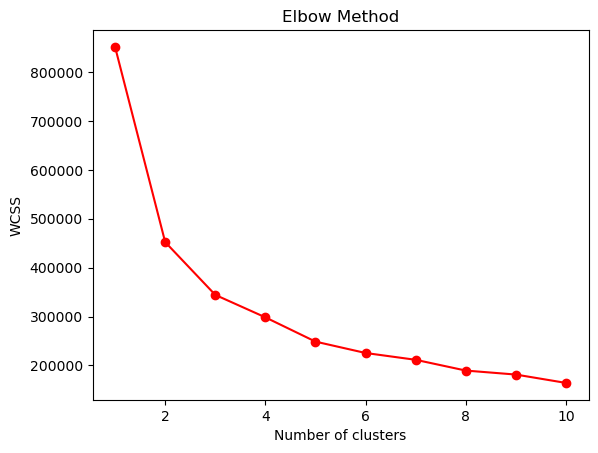

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# What is the Elbow Method?

The Elbow Method is a way to find the best number of clusters for K-Means clustering. It helps us decide how many groups to use to organize the data well.

---

# How to do the Elbow Method?

1. Try different numbers of clusters, for example from 1 to 10.
2. For each number, run K-Means and measure how close the points are inside each cluster. This measure is called WCSS (Within-Cluster Sum of Squares).
3. Write down the WCSS values for each number of clusters.
4. Draw a line chart of the number of clusters vs. the WCSS values.
5. Look for the point in the chart where the decrease in WCSS slows down a lot. This point looks like an "elbow" or a bend in the line.

---

# Why is the Elbow Method useful?

- It helps us choose a good number of clusters that balance between accuracy and simplicity.
- If we choose too few clusters, the groups may be too general.
- If we choose too many clusters, the groups may be too detailed and not useful.

---

# Summary

The Elbow Method shows us the best number of clusters to use by finding the point where adding more clusters does not improve the grouping much.


In [47]:
# Building clusters on all the features
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Save the results
X['Cluster'] = kmeans.labels_
X

,Age,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Cluster
0,63.0,1,145.0,233.0,150.0,0,2.3,3,0,6,1
1,67.0,4,160.0,286.0,108.0,1,1.5,2,3,3,0
2,67.0,4,120.0,229.0,129.0,1,2.6,2,2,7,1
3,37.0,3,130.0,250.0,187.0,0,3.5,3,0,3,1
4,41.0,2,130.0,204.0,172.0,0,1.4,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,110.0,264.0,132.0,0,1.2,2,0,7,0
299,68.0,4,144.0,193.0,141.0,0,3.4,2,2,7,1
300,57.0,4,130.0,131.0,115.0,1,1.2,2,1,7,1
301,57.0,2,130.0,236.0,174.0,0,0.0,2,1,3,1


## The goal: We know which features were the most important in defining the groups created by KMeans.

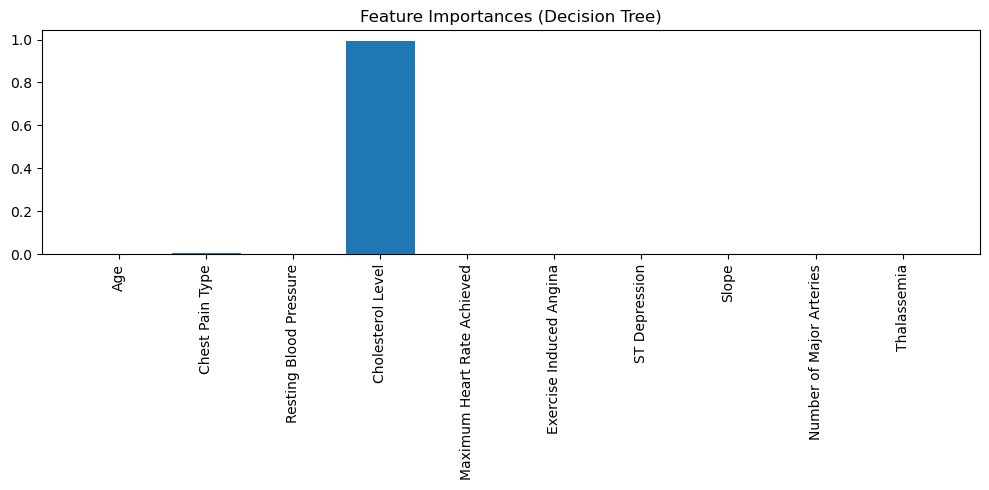


Significant Features (p < 0.05):
- Age: p = 0.0039
- Cholesterol Level: p = 0.0000
- Maximum Heart Rate Achieved: p = 0.0318
- Number of Major Arteries: p = 0.0101


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import scipy.stats as stats

# ------------------------
# 1. Decision Tree for Feature Importance after Clustering
# ------------------------

# We are creating a classifier using the labels generated by KMeans.
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X.drop('Cluster', axis=1), X['Cluster'])

# We print the importance of each feature.
importances = clf.feature_importances_
feature_names = X.drop('Cluster', axis=1).columns

# Drawing the importance of features
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.title("Feature Importances (Decision Tree)")
plt.tight_layout()
plt.show()

# ------------------------
# 2. ANOVA Test for Each Feature
# ------------------------

# We conduct ANOVA tests between the clusters for each feature.
anova_results = {}

for col in X.drop('Cluster', axis=1).columns:
    group_0 = X[kmeans.labels_ == 0][col]
    group_1 = X[kmeans.labels_ == 1][col]
    f_val, p_val = stats.f_oneway(group_0, group_1)
    anova_results[col] = p_val

print("\nSignificant Features (p < 0.05):")
for feature, p_val in anova_results.items():
    if p_val < 0.05:
        print(f"- {feature}: p = {p_val:.4f}")


# Notes: Interpreting Feature Importances from Decision Tree after KMeans

- After performing KMeans clustering, we trained a **Decision Tree Classifier** using the generated cluster labels as the target.
- This allows us to understand which features contributed the most to separating the clusters.

### What does the bar chart show?

- The bar chart displays the **Feature Importances** calculated by the Decision Tree.
- Each bar represents a feature from our dataset.
- The height of the bar reflects how much that feature contributed to the tree's decision-making process.
- Higher bars = More important features in distinguishing between the clusters.
- Features with very small or zero bars = These features had little or no impact on separating the clusters.

### Important Notes:

- The sum of all feature importance values is always 1.
- This approach gives an indirect interpretation of which features help explain the cluster structure.
- It does **NOT** guarantee the clusters are medically meaningful, it only reflects how the tree learned to separate them based on the features.

### Example Interpretation:

- If `Age` and `Cholesterol Level` have high importance values → These features are important for distinguishing between the clusters.
- If `Gender` has very low importance → Gender did not significantly contribute to cluster separation.

### Conclusion:

- This is a helpful way to interpret clustering results, but keep in mind:
  - KMeans is unsupervised → clusters are not guaranteed to correspond to real-world classes.
  - Always combine such analysis with domain knowledge and proper validation.


---
## Feature Importances vs. ANOVA Significance for KMeans Clusters
---

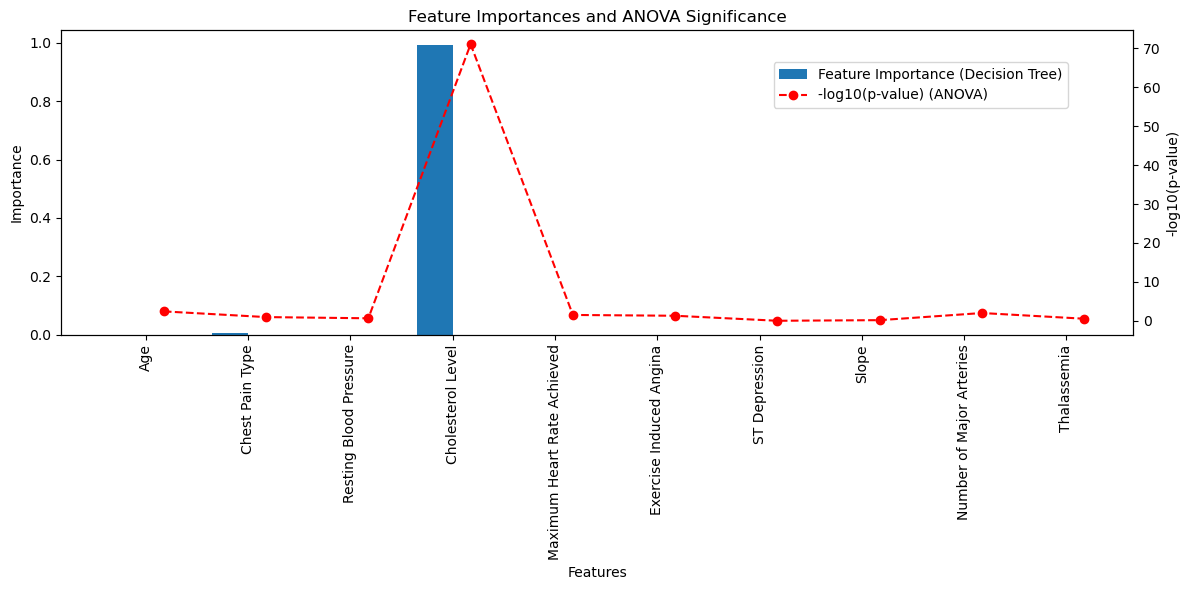

In [49]:
# 1. Feature importances
importances = clf.feature_importances_
feature_names = X.drop('Cluster', axis=1).columns

# 2. ANOVA p-values (convert them to -log10 so they appear on the plot)
anova_pvals = np.array([anova_results[col] for col in feature_names])
neg_log_pvals = -np.log10(anova_pvals)

# 3. Plot
x = np.arange(len(feature_names))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for feature importances
bars = ax1.bar(x - width/2, importances, width, label='Feature Importance (Decision Tree)')
ax1.set_xlabel('Features')
ax1.set_ylabel('Importance')
ax1.set_xticks(x)
ax1.set_xticklabels(feature_names, rotation=90)

# Line chart for -log10(p-values)
ax2 = ax1.twinx()
ax2.plot(x + width/2, neg_log_pvals, color='red', marker='o', linestyle='--', label='-log10(p-value) (ANOVA)')
ax2.set_ylabel('-log10(p-value)')

# Legends
fig.legend(loc='upper right', bbox_to_anchor=(0.9,0.9))
plt.title("Feature Importances and ANOVA Significance")
plt.tight_layout()
plt.show()


In [50]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# ARI and NMI for comparing the clusters with the true distribution
ari = adjusted_rand_score(y, kmeans.labels_)
nmi = normalized_mutual_info_score(y, kmeans.labels_)
sil_score = silhouette_score(X_features, kmeans.labels_)

print(f"Adjusted Rand Index (vs y): {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")


Adjusted Rand Index (vs y): 0.0272
Normalized Mutual Information: 0.0193
Silhouette Score: 0.3808


## Understanding How to Evaluate K-Means Clustering with Ground Truth Labels

When you have real labels (ground truth) for your data, like in the heart disease dataset where each patient is labeled as sick (1) or healthy (0), you can evaluate how well your K-Means clustering matches these true labels.

---

### Why Compare Clustering Results with True Labels?

- K-Means is an **unsupervised** algorithm that groups data based on similarity, without using the actual labels.
- By comparing the clusters with the true labels, you can see if the algorithm grouped similar patients correctly.
- For example, whether one cluster mostly contains sick patients and the other mostly healthy ones.

---

### Metrics to Measure Agreement Between Clusters and True Labels

#### 1. Adjusted Rand Index (ARI)

- Measures similarity between the clustering labels and the true labels.
- Adjusts for chance grouping.
- Score range: -1 to 1  
  - 1 means perfect match  
  - 0 means random labeling  
  - Less than 0 means worse than random

#### 2. Normalized Mutual Information (NMI)

- Measures the mutual information (shared information) between the clustering labels and true labels.
- Score range: 0 to 1  
  - 1 means perfect agreement  
  - 0 means no agreement

---

### What Do High Scores Mean?

- High ARI or NMI (e.g., above 0.7 or 0.8) means the clustering results closely match the true labels.
- This indicates that your clustering model is good and meaningful.

---

If you want, I can help you write the code to calculate ARI and NMI for your dataset.


## Understanding Silhouette Score for Clustering Quality

The Silhouette Score measures how well data points fit within their assigned clusters compared to other clusters.

- The score ranges from **-1 to 1**.
- A score **close to 1** means clusters are well separated and clearly defined.
- A score **close to 0** means clusters are overlapping or not well defined.
- A **negative score** indicates that data points might be assigned to the wrong clusters.

---

### Interpretation of a Silhouette Score of 0.1897

- A score around **0.1897** is relatively low.
- This indicates that the clusters are **not very cohesive** and there is significant overlap between clusters.
- The clustering quality is considered **weak to moderate**.

---
---

In [51]:
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([56.28333333, 53.2295082 ]), array([3.26666667, 3.08743169]))

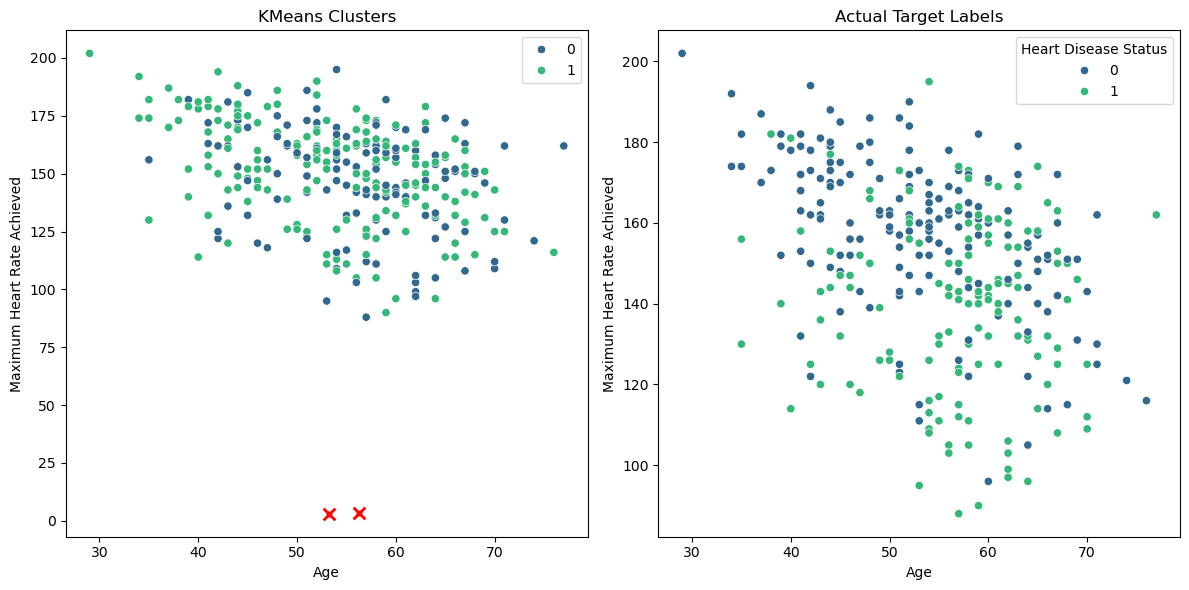

In [52]:
# Distribution display by KMeans clusters
plt.figure(figsize=(12, 6))

# plot the results
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='Age', y='Maximum Heart Rate Achieved', hue='Cluster', palette='viridis')
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0], 
    y=kmeans.cluster_centers_[:, 1], 
    marker='X',     # Big X marker for cluster centers
    s=200,          # Point size
    linewidth=3,    # Line thickness
    color='r'
)
plt.title('KMeans Clusters')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')

plt.subplot(1, 2, 2)
sns.scatterplot(data=X.drop('Cluster', axis=1), x='Age', y='Maximum Heart Rate Achieved', hue=y, palette='viridis')
plt.title('Actual Target Labels')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')

plt.tight_layout()
plt.show()


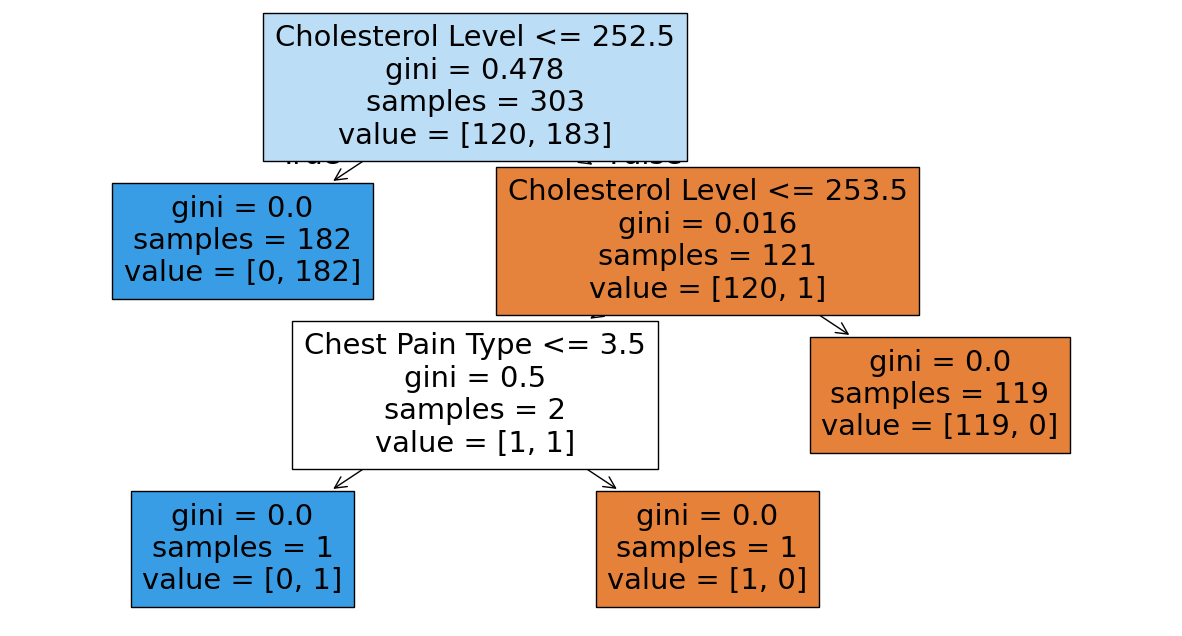

In [53]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()


## 2. Hierarchical Clustering

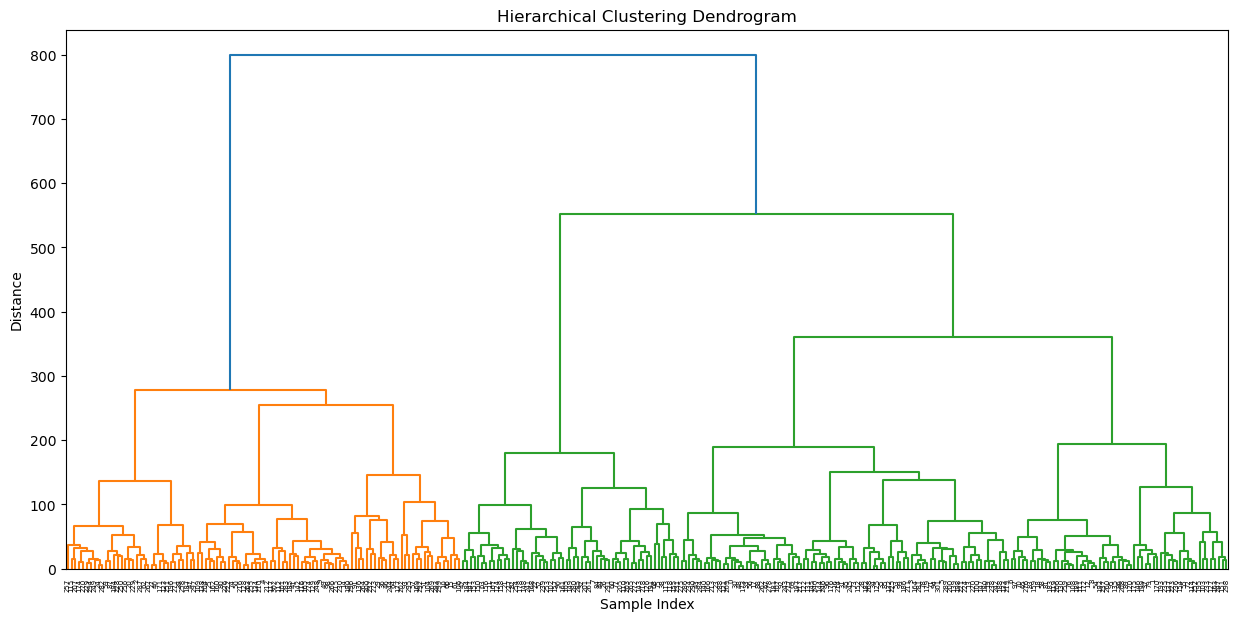

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
linked = linkage(df.drop(["Heart Disease Status"], axis=1), 'ward')

#Plot dendrogran
plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [59]:
# 3. Determining the number of clusters by cutting the tree at a certain height.
max_d = 600  # You can change it according to the shape of the dendrogram.
clusters = fcluster(linked, t=max_d, criterion='distance')

# 4. Creating a DataFrame to store the result along with the original data.
df_plot = df.copy()
df_plot['Cluster'] = clusters


In [60]:
df_plot

,Age,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status,Cluster
0,63.0,1,145.0,233.0,150.0,0,2.3,3,0,6,0,2
1,67.0,4,160.0,286.0,108.0,1,1.5,2,3,3,1,2
2,67.0,4,120.0,229.0,129.0,1,2.6,2,2,7,1,1
3,37.0,3,130.0,250.0,187.0,0,3.5,3,0,3,0,2
4,41.0,2,130.0,204.0,172.0,0,1.4,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,110.0,264.0,132.0,0,1.2,2,0,7,1,2
299,68.0,4,144.0,193.0,141.0,0,3.4,2,2,7,1,1
300,57.0,4,130.0,131.0,115.0,1,1.2,2,1,7,1,1
301,57.0,2,130.0,236.0,174.0,0,0.0,2,1,3,1,2


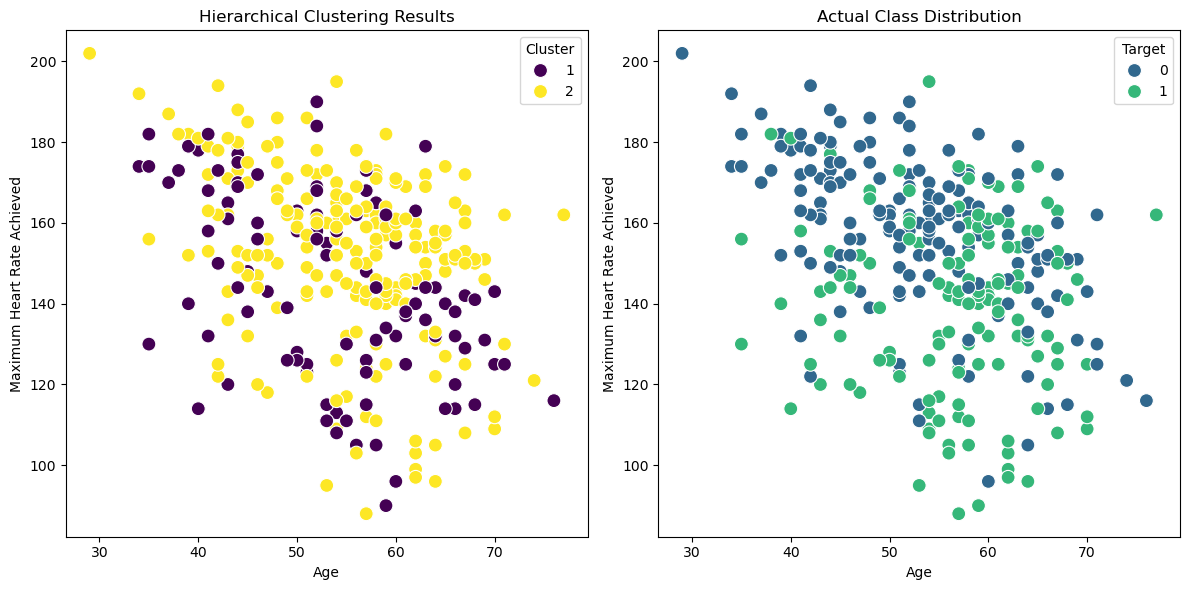

In [63]:
plt.figure(figsize=(12, 6))

# --------- Cluster result from Hierarchical Clustering ---------
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_plot, 
    x='Age', 
    y='Maximum Heart Rate Achieved', 
    hue='Cluster', 
    palette='viridis', 
    s=100
)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend(title='Cluster')

# --------- Actual Class Labels ---------
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_plot, 
    x='Age', 
    y='Maximum Heart Rate Achieved', 
    hue='Heart Disease Status', 
    palette='viridis', 
    s=100
)
plt.title('Actual Class Distribution')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend(title='Target')

plt.tight_layout()
plt.show()


In [64]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y, clusters)
nmi = normalized_mutual_info_score(y, clusters)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)


Adjusted Rand Index: -0.0005033460760279087
Normalized Mutual Information: 0.005770353431735127


In [65]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters)
print("Silhouette Score (Hierarchical):", score)


Silhouette Score (Hierarchical): 0.3010023541625377
